# Experiments

In this notebook is implemented the experiment described in the paper.

## Header

Libraries and additional programs

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from scipy.stats.stats import pearsonr, spearmanr

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,9]

pathh = '../Data/' 
exp_file = '../Data/Human_Similarity.xlsx'

## Initializing memory and encoding dataset in HD space

In [9]:
%run EncodingDataset.ipynb
Init_mem()

End of memory initialization
Begining to encode dataset...
End of encoding


## Concept similarity

### a) Human-judged similarity

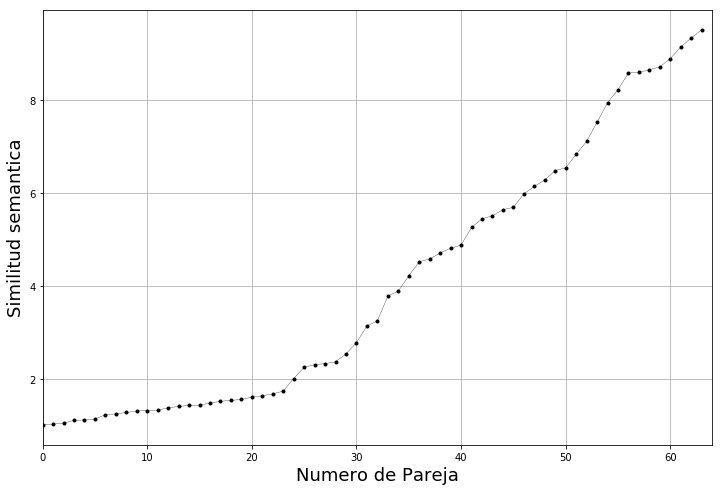

In [12]:
def ListofPairs ( ):
    "It obtains the list of concept pairs rated by Humans"
    df = pd.read_excel(exp_file)
    ordered = df.sort_values(by='Sim')
    c1 = map(str, list( ordered['concept 1'] ))
    c2 = map(str, list( ordered['concept 2'] ))
    L1 = map(list, zip(c1,c2))
    # Sorting by value
    ordered = df.sort_values(by='Sim')
    L2 = list(ordered['Sim'])
    return L1, L2

PConcepts, Hum_Sim = ListofPairs()

x = np.array(range(64))

plt.rcParams["figure.figsize"] = [12,8]

plt.plot(Hum_Sim, color='k', linestyle='-', marker='.', markersize=6, linewidth=.3 )  
plt.xlim((0,64))
plt.xlabel('Numero de Pareja', fontsize=18)
plt.ylabel('Similitud semantica', fontsize=18)
plt.grid(True)
plt.savefig('HumSim.png')


### b) Measuring similarity

In this cell we measure the similarity of each pair of concepts with each similarity measure.

In [13]:
# Create dictionary of distances for each method
Dict_HD = {}; Dict_McRae = {}; Dict_wup = {}; Dict_lch = {}; Dict_res = {}; Dict_jcn = {}

# Loop over all pairs of concepts
key = 0
print "Starting"
for pair in PConcepts:
    print key,
    Dict_HD[key] = 1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N)
    Dict_McRae[key] = McRae_simi(pair)
    Dict_wup[key] = similarity_fun(wn.wup_similarity, pair)
    Dict_lch[key] = similarity_fun(wn.lch_similarity, pair)
    Dict_res[key] = similarity_fun(wn.res_similarity, pair, brown_ic)
    Dict_jcn[key] = similarity_fun(wn.jcn_similarity, pair, brown_ic)
    key += 1
print "End"

Starting
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 End


#### Word2vec

The word2vec similarity values were obtained by using the online model GoogleNews Negative 300 located in:
http://bionlp-www.utu.fi/wv_demo/

In [14]:
wor2vec = [0.8266455382108688, 0.8415886908769608, 0.6807796359062195, 0.8549512177705765, 0.7889042645692825,0.7572457492351532, 0.9644697681069374,
 0.9086581096053123, 0.721133679151535, 0.798522099852562, 0.6787266135215759, 0.647223562002182, 0.8754299804568291, 0.7132392525672913, 0.5137060284614563,
 0.7079006731510162, 0.7908777445554733, 0.6040608584880829, 0.7750198692083359, 0.8645816594362259, 0.801501139998436, 0.8661240190267563, 0.9446705915033817,
 0.7778908014297485,0.7617271989583969, 0.9460270218551159, 0.6787038743495941, 0.6298098266124725, 0.34256309270858765, 0.5335637629032135, 0.425468385219574,
 0.6396835148334503, 0.7532171458005905, 0.6008948087692261, 0.6555060744285583, 0.8036634474992752, 0.6344016194343567, 0.5572055578231812,
 0.5680522620677948, 0.6650005877017975, 0.7124116122722626, 0.8490201681852341, 0.4361061453819275, 0.7542188316583633, 0.7908401340246201, 0.6777022778987885,
 0.7414279878139496, 0.6713162362575531, 0.6733077168464661, 0.4685635566711426, 0.696144700050354,0.4178849458694458, 0.4083590507507324, 0.3246746063232422, 0.8281060010194778, 0.4699099063873291, 0.5488384962081909, 0.4087533950805664, 0.2889356017112732, 0.5542740821838379, 0.34602856636047363, 0.8630458861589432,
 0.3001639246940613, 0.5954327881336212]

# Getting similarity instead of distance
wor2vec = map(lambda x: 1-x, wor2vec)

### c) Computing correlations

In [19]:
# 1) Obtain "human list", it can be the average responses or an specific one
Hum_sim =  ListofPairs( ) #or Q + #0-30
    
# 2) Obtain list of ordered concepts (keys)
keys = map(lambda x: PConcepts.index(x), Hum_sim[0])
    
# 3) Create a list of distances according to each metric by consulting the appropiate dictionary
HD_simm = [Dict_HD[x] for x in keys]
HD_sim = map(lambda x: (x - min(HD_simm)) / (max(HD_simm) - min(HD_simm)), HD_simm)
McRae_sim = [Dict_McRae[x] for x in keys]
wup_sim = [Dict_wup[x] for x in keys]
lch_sim = [Dict_lch[x] for x in keys]
res_sim = [Dict_res[x] for x in keys]
jcn_sim = [Dict_jcn[x] for x in keys]

# 4) Calculate correlations
correlations = [['HDC', spearmanr(Hum_sim[1], HD_sim)[0]], ['McRae', spearmanr(Hum_sim[1], McRae_sim)[0]],
                ['wup', spearmanr(Hum_sim[1], wup_sim)[0]], ['lch', spearmanr(Hum_sim[1], lch_sim)[0]],
                ['res', spearmanr(Hum_sim[1], res_sim)[0]], ['jcn', spearmanr(Hum_sim[1], jcn_sim)[0]],
                ['word2vec', spearmanr(Hum_sim[1],wor2vec)[0]]]

print correlations

[['HDC', 0.6856384076523867], ['McRae', 0.6542883509141482], ['wup', 0.4878437743196569], ['lch', 0.45616846827377666], ['res', 0.5889759696191895], ['jcn', 0.4367916159877857], ['word2vec', 0.549587912087912]]


## d) Plotting

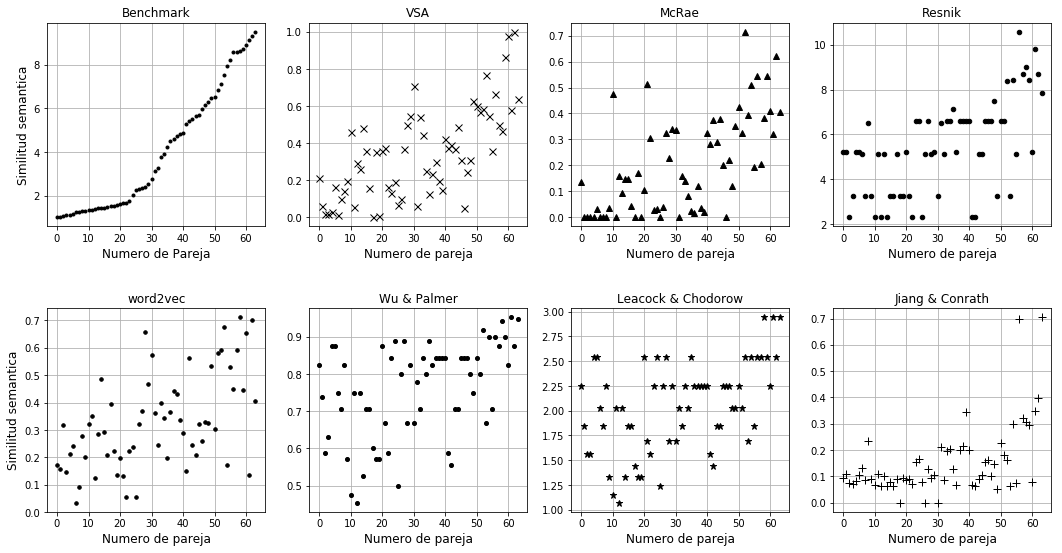

In [59]:
# Plotting
plt.rcParams["figure.figsize"] = [18, 9]
f_size = 12

plt.subplots_adjust(hspace=0.4)

# Human similarity
plt.subplot(241)
plt.plot(Hum_Sim, color='k', linestyle='None', marker='.', markersize=6, linewidth=.3 )  
plt.title('Benchmark', fontsize=f_size)
plt.xlabel('Numero de Pareja', fontsize=f_size)
plt.ylabel('Similitud semantica', fontsize=f_size)
plt.grid(True)

# VSA
plt.subplot(242)
plt.plot(HD_sim, color='k', linestyle='None', marker='x', markersize=7, linewidth=1 )  
plt.title('VSA', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.grid(True)

# McRae
plt.subplot(243)
plt.plot(McRae_sim, color='k', linestyle='None', marker='^', markersize=6, linewidth=1 )  
plt.title('McRae', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.grid(True)

# Resnick
plt.subplot(244)
plt.plot(res_sim, color='k', linestyle='None', marker='.', markersize=9, linewidth=1 )  
plt.title('Resnik', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.grid(True)

# word2vec
plt.subplot(245)
plt.plot(wor2vec, color='k', linestyle='None', marker='.', markersize=7, linewidth=1 )  
plt.title('word2vec', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
plt.ylabel('Similitud semantica', fontsize=f_size)
plt.grid(True)

# WuP
plt.subplot(246)
plt.plot(wup_sim, color='k', linestyle='None', marker='.', markersize=8, linewidth=1 )  
plt.title('Wu & Palmer', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.grid(True)

# LCH
plt.subplot(247)
plt.plot(lch_sim, color='k', linestyle='None', marker='*', markersize=7, linewidth=1 )  
plt.title('Leacock & Chodorow', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.grid(True)

#JnC
plt.subplot(248)
plt.plot(jcn_sim, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('Jiang & Conrath', fontsize=f_size)
plt.xlabel('Numero de pareja', fontsize=f_size)
#plt.ylabel('Similitud semantica', fontsize=f_size)
plt.grid(True)

plt.savefig('SubPlots.png') #, dpi=1000)